In [2]:
import pandas as pd
import numpy as np

# define the name of the csv file you want to read in
accounts = './data/accounts.csv'
playbacks = './data/playbacks.csv'
subscriptions = './data/subscriptions.csv'

# ACCOUNTS

In [47]:
# Read accounts (01.10.2020 - 01.10.2022)
df_accounts = pd.read_csv(accounts)
df_accounts.columns = df_accounts.columns.str.lower()
display(df_accounts.shape)
display(df_accounts.head())

(17079, 7)

,account_key,postal_code,city,language,country_code,onetime_rental_count,subscription_count
0,60a90104f44414d9036aed7d96d1468a5a9e1d104b6791...,5430,Wettingen,de,CH,0,1
1,a48b28809457e680de54b4b560e00117308431c574aab2...,8706,Meilen,de,CH,0,1
2,7a280859423057ac5f1e0bfc15af602edd23900f3cf7cb...,1005,Lausanne,fr,CH,1,0
3,23e7ac18b391549e95a98d85a3adae1f3f90c4fcc09732...,4436,Oberdorf,de,CH,0,2
4,a39dbaa7972fb67c15db79d4a66cf5d1b94855ae530774...,6005,Luzern,de,CH,8,2


In [48]:
df_accounts.dtypes

account_key             object
postal_code             object
city                    object
language                object
country_code            object
onetime_rental_count     int64
subscription_count       int64
dtype: object

In [49]:
display(df_accounts.country_code.nunique())
df_accounts.country_code.unique()

56

array(['CH', 'DE', 'GR', 'LI', 'US', 'AT', 'TH', 'FR', 'GB', 'BE', 'RU',
       'EG', 'HK', 'PT', 'IT', 'SA', 'NZ', 'MX', 'PE', 'CO', 'PL', 'CA',
       'ID', 'ES', 'HU', 'IL', 'NO', 'AU', 'CL', 'NL', 'ZA', 'JO', 'RS',
       'RO', 'IE', 'KR', 'SK', 'AE', 'GH', 'BR', 'MY', 'SE', 'CZ', 'DK',
       'IN', 'JP', 'TR', 'CI', 'EE', 'GA', 'SM', 'WF', 'FI', 'UA', 'SG',
       'IR'], dtype=object)

In [50]:
df_accounts.country_code.value_counts()
#16.5k DACH / 17k in total

CH    15200
DE     1272
AT      190
FR      112
US       71
GB       46
LI       39
CA       17
IT       13
BE       11
SE        9
AU        8
NO        8
IN        6
NL        6
DK        5
PL        4
PT        4
CO        3
NZ        3
CZ        3
HU        3
IL        3
SK        2
AE        2
EE        2
CL        2
ES        2
RU        2
GR        2
MX        2
ID        2
EG        2
SG        1
UA        1
FI        1
WF        1
SM        1
GA        1
CI        1
TR        1
JP        1
TH        1
HK        1
MY        1
BR        1
GH        1
SA        1
KR        1
IE        1
RO        1
RS        1
JO        1
ZA        1
PE        1
IR        1
Name: country_code, dtype: int64

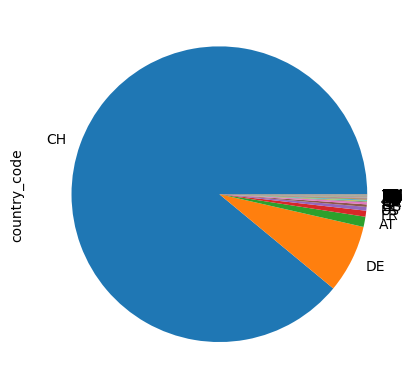

In [51]:
df_accounts.country_code.value_counts().plot(kind='pie');

In [52]:
display(df_accounts.language.nunique())
display(df_accounts.language.unique())
display(df_accounts.language.value_counts())

4

array(['de', 'fr', 'en', nan, 'nl'], dtype=object)

de    10942
fr     4286
en     1794
nl        1
Name: language, dtype: int64

In [53]:
df_accounts.onetime_rental_count.unique()

array([  0,   1,   8,   2,  10,   3,  12,  23,   4,   6,  15,   5,  14,
         7,  11,  29,  16,   9,  22,  17,  39,  26,  19,  13,  27,  47,
        18,  37,  20,  24,  32,  53,  21,  28,  25,  31, 106,  52,  48,
        44,  51,  35,  30,  65,  45,  38,  61,  57,  79])

In [54]:
display(df_accounts.subscription_count.unique())
display(df_accounts.subscription_count.value_counts())
#most have no subscription (assumption: onetime-viewer and gifted movie?)

array([ 1,  0,  2,  3,  6,  4,  5,  7, 11,  8, 12,  9, 13])

0     8103
1     6776
2     1613
3      412
4       96
5       36
7       19
6       13
8        7
11       1
12       1
9        1
13       1
Name: subscription_count, dtype: int64

In [55]:
#Check for accounts with no subscription
#display(df_accounts.subscription_count.unique())
df_accounts['subscription_count'].apply(lambda x: True if x == 0 else False).value_counts()

False    8976
True     8103
Name: subscription_count, dtype: int64

# PLAYBACKS

In [4]:
# Read playbacks
df_playbacks = pd.read_csv(playbacks)
df_playbacks.columns = df_playbacks.columns.str.lower()
display(df_playbacks.shape)
display(df_playbacks.head())
# one account can have multiple subscriptions
# what about pausing the movie
# IP + User_Agent-> check for multiple persons per subscriptions
    # IP/Account
# average playback duration
# cancelled session?

(139569, 7)

,subscription_key,account_key,movie_id,date_start,playback_time,user_agent,ip_hash
0,9679626b6cc1765f8bc8da98fda2d8e8f28f40736fd777...,024ebde74e23ca924cff0a3989e7f87efe2b2cbcd7ad2c...,1189,2022-09-30 23:55:31,12420,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,0b14aa31d5635ee899be928089fd810c655a7ec7785911...
1,513d006472c99ef047c64bafad57a39906ad5c618505b1...,8968e3851322a89c265a0ec4c81341361e3b0953502d65...,1327,2022-09-30 23:48:36,1440,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_4...,c65100e7d48b9e06ca6d89ffe594066553ea63ddc70ee1...
2,cac0c77d3aedc55303b8dfea314052eba5dcf4817e4962...,8a2d7ac64595778ed5fe7edb2dd43f843f9879d773df1a...,212,2022-09-30 23:47:33,1080,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:1...,db17d38bf724c377dcd463f7ad8df8279b6122c8890773...
3,a35503448084642ac8651a0f482db410ccdd7c7716df1d...,7f654ed491a8d1c5b6eb54ea98f6b30b0f9d9515aaad22...,108,2022-09-30 23:46:52,5400,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:1...,69839531a94bf2468744c083a7bf4b78f39c8b1b299c34...
4,ff97a5e4ea0bb411f72e2e1750fb94b248ec2026406a3f...,6efdbec56858f25686797c974bfa67809a718408bd3631...,1314,2022-09-30 23:16:49,10380,"filmingo v2.1 (83); iOS 15.6.1; iPad8,11",652d233c8526ebefb7a8e939ca546fe1a76498775b682a...


In [78]:
df_playbacks.isna().sum()

subscription_key    0
account_key         0
movie_id            0
date_start          0
playback_time       0
user_agent          0
ip_hash             0
dtype: int64

In [23]:
df_playbacks.describe()
# have a closer look at max playback times

,movie_id,playback_time
count,139569.000000,139569.00000
mean,712.801589,6442.57679
std,346.698325,8191.70516
min,8.000000,960.00000
25%,453.000000,4680.00000
50%,745.000000,5760.00000
75%,977.000000,6660.00000
max,1344.000000,472920.00000


In [58]:
df_playbacks.movie_id.nunique()

1202

In [78]:
#DIFFERENTIATION BETWEEN DESKTOP/MOBILE
#TODO Create 'DESKTOP vs. MOBILE' column
#TODO filmingo app users dedicated column?!

#df_playbacks.user_agent.count()
#5387 unique values
#139.569 count

#SEARCH FOR 'Macintosh'
#df_playbacks[df_playbacks.user_agent.str.contains('Macintosh', na=False)].user_agent.count()
#64.401 count ~50%

#SEARCH FOR 'Windows'
#df_playbacks[df_playbacks.user_agent.str.contains('Windows', na=False)].user_agent.count()
#41.475

#DESKTOP Views
df_playbacks[df_playbacks.user_agent.str.contains(('Windows|Macintosh|TV|Linux'), na=False)].user_agent.count()
#117.081 Desktop playbacks

# Mobile Views
#df_playbacks[df_playbacks.user_agent.str.contains(('Android|iOS|iPhone|iPad'), na=False)].user_agent.count()
# 22.800 Mobile views


#HOW MANY PEOPLE ARE USING THE APP
#df_playbacks[df_playbacks.user_agent.str.contains('filmingo', na=False)].user_agent.count()
#13.173 playbacks via the app



117081

In [84]:
#Let's create the new columns
df_playbacks.loc[df_playbacks['user_agent'].str.contains('Windows|Macintosh|TV|Linux'), 'device'] = 'desktop'
df_playbacks.loc[df_playbacks['user_agent'].str.contains('Android|iOS|iPhone|iPad'), 'device'] = 'mobile'
df_playbacks.device.value_counts()
#df_playbacks[~df_playbacks.device.str.contains(('Android|iOS|iPhone|iPad|Windows|Macintosh|TV|Linux'), na=False)].count()



desktop    109852
mobile      22800
Name: device, dtype: int64

# SUBSCRIPTIONS

In [60]:
# Read subscriptions
df_subscriptions = pd.read_csv(subscriptions)
df_subscriptions.columns = df_subscriptions.columns.str.lower()

display(df_subscriptions.shape)
display(df_subscriptions.head(10))

(12115, 9)

,subscription_key,account_key,currency,price,subscription_type,subscription_monthly,subscription_start,subscription_end,gift_subscription
0,1b82b2308dcae546ad0194d03b9d23edd5d2781109de28...,ab1bcf2c1b8d4eb422079becc0c59b1c7db2fd009235d2...,chf,90.0,BASIC,0,2017-02-24,2021-02-23,False
1,4cb9f67d44d60eca0485270d73b3028143021296081847...,ee1a45a439dc6968f1cfc2b9840264deeada4c0d93f389...,chf,90.0,BASIC,0,2017-08-21,2023-08-20,False
2,40f9e218b70a6f482ecfcde0011305d93fa6059f624a50...,8bf8f58e615549df5f05b717b6e914da80e213edab3dba...,chf,9.0,BASIC,1,2017-09-26,2022-10-08,False
3,69d21e601612cc97fc7df9bd17a281879f785358d1c681...,cf914aa939499e8e18fdd9494fce5297b9dce2e1f909ea...,chf,90.0,BASIC,0,2017-09-28,2021-09-27,False
4,29f98a3154a679f2fe953b1f3b148ddffcb28e60fff719...,8759ab0e44c1cf688770220cf1b87efac2726baca6bfcb...,eur,11.0,STANDARD,1,2017-10-13,2021-10-12,False
5,f5627e4ef66f219cfbcfb507a056bf1a0629f085a46e92...,c5511d59d31159ecb87ca1d7cfb3e44a6c4a4b96e5632a...,chf,240.0,PATRON,0,2017-11-18,2020-11-17,False
6,8e42bc7151b4b0dd29e362b95fec4aa3b8e53c532d40ba...,7f1182ed60acb48e4a55eb54b91bca7f20c55c066d8848...,chf,150.0,STANDARD,0,2017-12-20,2021-12-19,False
7,9f22270608209a507f93f3a74448a78a82f9741bc36ea3...,2c2621bf34f1cc419c0868f27ffece66dc1fb4f5ec665c...,chf,9.0,BASIC,1,2017-12-21,2020-11-08,False
8,03411f3ad7d86f2e1df3db5a337c3025ba35159eb9b41e...,163db260041d30a58540a19312d416c9fc7cc696754108...,chf,9.0,BASIC,1,2017-12-22,2020-10-08,False
9,c254cee83dfc67c794b843a0ad622456cb36fdfe5143c4...,47e795383bff3d37a251be1d911ffc0a7ca6f0da8b70a4...,chf,240.0,PATRON,0,2017-12-31,2022-12-30,False


In [77]:
df_subscriptions.isna().sum()

subscription_key           0
account_key                0
currency                   0
price                   1636
subscription_type          0
subscription_monthly       0
subscription_start         0
subscription_end           0
gift_subscription          0
dtype: int64

In [61]:
df_subscriptions.subscription_type.unique()

array(['BASIC', 'STANDARD', 'PATRON', 'FULLACCESS'], dtype=object)

In [62]:
df_subscriptions.dtypes

subscription_key         object
account_key              object
currency                 object
price                   float64
subscription_type        object
subscription_monthly      int64
subscription_start       object
subscription_end         object
gift_subscription          bool
dtype: object

In [63]:
display(df_subscriptions.price.unique())
display(df_subscriptions.price.value_counts())

array([ 90. ,   9. ,  11. , 240. , 150. , 110. ,  15. ,   6. ,  60. ,
        12.5,   7.5,   nan, 125. ,  75. , 200. ,  82. , 220. , 210. ,
         0. , 172.5,  67.5, 102.5, 192. ,  27. , 195. ])

9.0      2917
90.0     2535
15.0     2118
150.0    1146
240.0    1052
7.5       272
12.5      166
75.0      141
200.0      50
125.0      46
0.0        18
60.0        3
110.0       2
11.0        2
102.5       2
6.0         1
82.0        1
220.0       1
210.0       1
172.5       1
67.5        1
192.0       1
27.0        1
195.0       1
Name: price, dtype: int64

In [64]:
#df_subscriptions.price.isin(['60.0']).nunique()
df_subscriptions_new = df_subscriptions[df_subscriptions['price'].isin([9.0, 90.0, 15.0, 150.0, 240.0, 7.5, 12.5, 75.0, 200.0, 125.0])]
df_subscriptions_new.head()



,subscription_key,account_key,currency,price,subscription_type,subscription_monthly,subscription_start,subscription_end,gift_subscription
0,1b82b2308dcae546ad0194d03b9d23edd5d2781109de28...,ab1bcf2c1b8d4eb422079becc0c59b1c7db2fd009235d2...,chf,90.0,BASIC,0,2017-02-24,2021-02-23,False
1,4cb9f67d44d60eca0485270d73b3028143021296081847...,ee1a45a439dc6968f1cfc2b9840264deeada4c0d93f389...,chf,90.0,BASIC,0,2017-08-21,2023-08-20,False
2,40f9e218b70a6f482ecfcde0011305d93fa6059f624a50...,8bf8f58e615549df5f05b717b6e914da80e213edab3dba...,chf,9.0,BASIC,1,2017-09-26,2022-10-08,False
3,69d21e601612cc97fc7df9bd17a281879f785358d1c681...,cf914aa939499e8e18fdd9494fce5297b9dce2e1f909ea...,chf,90.0,BASIC,0,2017-09-28,2021-09-27,False
5,f5627e4ef66f219cfbcfb507a056bf1a0629f085a46e92...,c5511d59d31159ecb87ca1d7cfb3e44a6c4a4b96e5632a...,chf,240.0,PATRON,0,2017-11-18,2020-11-17,False


In [65]:
#Check is Standard and Basic is the same
df_subscriptions_new[df_subscriptions_new.subscription_type.isin(['BASIC'])].price.value_counts()

9.0     2917
90.0    2533
7.5      272
75.0     139
Name: price, dtype: int64

In [66]:
#Check is Standard and Basic is the same
df_subscriptions_new[df_subscriptions_new.subscription_type.isin(['STANDARD'])].price.value_counts()

15.0     2118
150.0    1146
12.5      166
125.0      46
75.0        2
90.0        1
Name: price, dtype: int64

In [67]:
# drop currency and old price column

In [68]:
# drop "wrong" price columns
df_subscriptions_new.drop(df_subscriptions_new[(df_subscriptions_new['subscription_type'] == 'STANDARD') & (df_subscriptions_new['currency'] == 'chf') & (df_subscriptions_new['price'] == 90)].index, inplace = True)

/var/folders/r7/q9jl0fh51t9g8_18f84fg8rr0000gp/T/ipykernel_43901/751530836.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subscriptions_new.drop(df_subscriptions_new[(df_subscriptions_new['subscription_type'] == 'STANDARD') & (df_subscriptions_new['currency'] == 'chf') & (df_subscriptions_new['price'] == 90)].index, inplace = True)


In [69]:
df_subscriptions_new.drop(df_subscriptions_new[(df_subscriptions_new['subscription_type'] == 'FULLACCESS') & (df_subscriptions_new['currency'] == 'chf') & (df_subscriptions_new['price'] == 90)].index, inplace = True)

/var/folders/r7/q9jl0fh51t9g8_18f84fg8rr0000gp/T/ipykernel_43901/2348414299.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subscriptions_new.drop(df_subscriptions_new[(df_subscriptions_new['subscription_type'] == 'FULLACCESS') & (df_subscriptions_new['currency'] == 'chf') & (df_subscriptions_new['price'] == 90)].index, inplace = True)


In [70]:
df_subscriptions_new.drop(df_subscriptions_new[(df_subscriptions_new['subscription_type'] == 'STANDARD') & (df_subscriptions_new['currency'] == 'chf') & (df_subscriptions_new['price'] == 75)].index, inplace = True)

/var/folders/r7/q9jl0fh51t9g8_18f84fg8rr0000gp/T/ipykernel_43901/2852595276.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subscriptions_new.drop(df_subscriptions_new[(df_subscriptions_new['subscription_type'] == 'STANDARD') & (df_subscriptions_new['currency'] == 'chf') & (df_subscriptions_new['price'] == 75)].index, inplace = True)


In [71]:
# drop "wrong" subscription_monthly column
df_subscriptions_new.drop(df_subscriptions_new[(df_subscriptions_new['subscription_type'] == 'STANDARD') & (df_subscriptions_new['currency'] == 'chf') & (df_subscriptions_new['price'] == 15) & (df_subscriptions_new['subscription_monthly'] == 0)].index, inplace = True)

/var/folders/r7/q9jl0fh51t9g8_18f84fg8rr0000gp/T/ipykernel_43901/4257649344.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subscriptions_new.drop(df_subscriptions_new[(df_subscriptions_new['subscription_type'] == 'STANDARD') & (df_subscriptions_new['currency'] == 'chf') & (df_subscriptions_new['price'] == 15) & (df_subscriptions_new['subscription_monthly'] == 0)].index, inplace = True)


In [72]:
df_subscriptions_new.groupby(['currency','price']).subscription_type.value_counts()

currency  price  subscription_type
chf       9.0    BASIC                2917
          15.0   STANDARD             2117
          90.0   BASIC                2533
          150.0  STANDARD             1146
          240.0  PATRON               1052
eur       7.5    BASIC                 272
          12.5   STANDARD              166
          75.0   BASIC                 139
          125.0  STANDARD               46
          200.0  PATRON                 50
Name: subscription_type, dtype: int64

In [73]:
df_subscriptions_new.groupby(['currency','price', 'subscription_monthly']).subscription_type.value_counts()

currency  price  subscription_monthly  subscription_type
chf       9.0    1                     BASIC                2917
          15.0   1                     STANDARD             2117
          90.0   0                     BASIC                2533
          150.0  0                     STANDARD             1146
          240.0  0                     PATRON               1052
eur       7.5    1                     BASIC                 272
          12.5   1                     STANDARD              166
          75.0   0                     BASIC                 139
          125.0  0                     STANDARD               46
          200.0  0                     PATRON                 50
Name: subscription_type, dtype: int64

In [74]:
df_subscriptions_new.head(20)

,subscription_key,account_key,currency,price,subscription_type,subscription_monthly,subscription_start,subscription_end,gift_subscription
0,1b82b2308dcae546ad0194d03b9d23edd5d2781109de28...,ab1bcf2c1b8d4eb422079becc0c59b1c7db2fd009235d2...,chf,90.0,BASIC,0,2017-02-24,2021-02-23,False
1,4cb9f67d44d60eca0485270d73b3028143021296081847...,ee1a45a439dc6968f1cfc2b9840264deeada4c0d93f389...,chf,90.0,BASIC,0,2017-08-21,2023-08-20,False
2,40f9e218b70a6f482ecfcde0011305d93fa6059f624a50...,8bf8f58e615549df5f05b717b6e914da80e213edab3dba...,chf,9.0,BASIC,1,2017-09-26,2022-10-08,False
3,69d21e601612cc97fc7df9bd17a281879f785358d1c681...,cf914aa939499e8e18fdd9494fce5297b9dce2e1f909ea...,chf,90.0,BASIC,0,2017-09-28,2021-09-27,False
5,f5627e4ef66f219cfbcfb507a056bf1a0629f085a46e92...,c5511d59d31159ecb87ca1d7cfb3e44a6c4a4b96e5632a...,chf,240.0,PATRON,0,2017-11-18,2020-11-17,False
6,8e42bc7151b4b0dd29e362b95fec4aa3b8e53c532d40ba...,7f1182ed60acb48e4a55eb54b91bca7f20c55c066d8848...,chf,150.0,STANDARD,0,2017-12-20,2021-12-19,False
7,9f22270608209a507f93f3a74448a78a82f9741bc36ea3...,2c2621bf34f1cc419c0868f27ffece66dc1fb4f5ec665c...,chf,9.0,BASIC,1,2017-12-21,2020-11-08,False
8,03411f3ad7d86f2e1df3db5a337c3025ba35159eb9b41e...,163db260041d30a58540a19312d416c9fc7cc696754108...,chf,9.0,BASIC,1,2017-12-22,2020-10-08,False
9,c254cee83dfc67c794b843a0ad622456cb36fdfe5143c4...,47e795383bff3d37a251be1d911ffc0a7ca6f0da8b70a4...,chf,240.0,PATRON,0,2017-12-31,2022-12-30,False
10,612235c848d8c41d317be6e63d5d05799defa916a5c3fd...,ea12fb65247707f6d50eca5a0ecff7553cab9947b788bf...,chf,90.0,BASIC,0,2018-01-12,2021-01-12,False


In [75]:
# Create two columns for chf and eur based on the subscription_type and prices from the filmingo website

# create a list of our conditions
conditions = [
    ((df_subscriptions_new['subscription_type'] == 'BASIC') & (df_subscriptions_new['subscription_monthly'] == 0)),
    ((df_subscriptions_new['subscription_type'] == 'BASIC') & (df_subscriptions_new['subscription_monthly'] == 1)),
    ((df_subscriptions_new['subscription_type'] == 'STANDARD') & (df_subscriptions_new['subscription_monthly'] == 0)),
    ((df_subscriptions_new['subscription_type'] == 'STANDARD') & (df_subscriptions_new['subscription_monthly'] == 1)),
    ((df_subscriptions_new['subscription_type'] == 'PATRON') & (df_subscriptions_new['subscription_monthly'] == 0))

]

# create a list of the values we want to assign for each condition
values_chf = ['90.0', '9.0', '150.0', '15.0', '240.0']
values_eur = ['75.0', '7.5', '125.0', '12.5', '200.0']

# create a new column and use np.select to assign values to it using our lists as arguments
df_subscriptions_new['price_chf'] = np.select(conditions, values_chf)
df_subscriptions_new['price_eur'] = np.select(conditions, values_eur)




/var/folders/r7/q9jl0fh51t9g8_18f84fg8rr0000gp/T/ipykernel_43901/2398592691.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subscriptions_new['price_chf'] = np.select(conditions, values_chf)
/var/folders/r7/q9jl0fh51t9g8_18f84fg8rr0000gp/T/ipykernel_43901/2398592691.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subscriptions_new['price_eur'] = np.select(conditions, values_eur)


,subscription_key,account_key,currency,price,subscription_type,subscription_monthly,subscription_start,subscription_end,gift_subscription,price_chf,price_eur
0,1b82b2308dcae546ad0194d03b9d23edd5d2781109de28...,ab1bcf2c1b8d4eb422079becc0c59b1c7db2fd009235d2...,chf,90.0,BASIC,0,2017-02-24,2021-02-23,False,90.0,75.0
1,4cb9f67d44d60eca0485270d73b3028143021296081847...,ee1a45a439dc6968f1cfc2b9840264deeada4c0d93f389...,chf,90.0,BASIC,0,2017-08-21,2023-08-20,False,90.0,75.0
2,40f9e218b70a6f482ecfcde0011305d93fa6059f624a50...,8bf8f58e615549df5f05b717b6e914da80e213edab3dba...,chf,9.0,BASIC,1,2017-09-26,2022-10-08,False,9.0,7.5
3,69d21e601612cc97fc7df9bd17a281879f785358d1c681...,cf914aa939499e8e18fdd9494fce5297b9dce2e1f909ea...,chf,90.0,BASIC,0,2017-09-28,2021-09-27,False,90.0,75.0
5,f5627e4ef66f219cfbcfb507a056bf1a0629f085a46e92...,c5511d59d31159ecb87ca1d7cfb3e44a6c4a4b96e5632a...,chf,240.0,PATRON,0,2017-11-18,2020-11-17,False,240.0,200.0


In [76]:
# display updated DataFrame
df_subscriptions_new.head()

,subscription_key,account_key,currency,price,subscription_type,subscription_monthly,subscription_start,subscription_end,gift_subscription,price_chf,price_eur
0,1b82b2308dcae546ad0194d03b9d23edd5d2781109de28...,ab1bcf2c1b8d4eb422079becc0c59b1c7db2fd009235d2...,chf,90.0,BASIC,0,2017-02-24,2021-02-23,False,90.0,75.0
1,4cb9f67d44d60eca0485270d73b3028143021296081847...,ee1a45a439dc6968f1cfc2b9840264deeada4c0d93f389...,chf,90.0,BASIC,0,2017-08-21,2023-08-20,False,90.0,75.0
2,40f9e218b70a6f482ecfcde0011305d93fa6059f624a50...,8bf8f58e615549df5f05b717b6e914da80e213edab3dba...,chf,9.0,BASIC,1,2017-09-26,2022-10-08,False,9.0,7.5
3,69d21e601612cc97fc7df9bd17a281879f785358d1c681...,cf914aa939499e8e18fdd9494fce5297b9dce2e1f909ea...,chf,90.0,BASIC,0,2017-09-28,2021-09-27,False,90.0,75.0
5,f5627e4ef66f219cfbcfb507a056bf1a0629f085a46e92...,c5511d59d31159ecb87ca1d7cfb3e44a6c4a4b96e5632a...,chf,240.0,PATRON,0,2017-11-18,2020-11-17,False,240.0,200.0
